# CS381 Data Analytics Final Project

### Due on 12/11/2019 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income2.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project
* The second and third performance model with have 2 extra points capped at 20 points for the whole final project.




### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


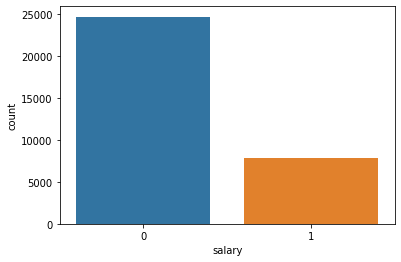

In [6]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

# Exploratory Data analysis

In [7]:
df.isnull().values.any()

False

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [9]:
df.shape

(32570, 15)

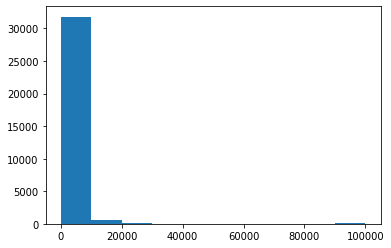

In [10]:
plt.hist(df['capital-gain'].values)
plt.show()

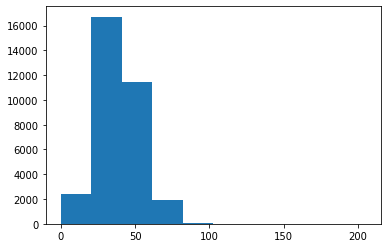

In [11]:
plt.hist(df['age'])
plt.show()

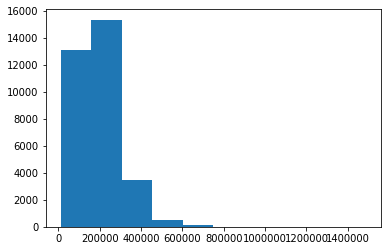

In [12]:
plt.hist(df['fnlwgt'].values)
plt.show()

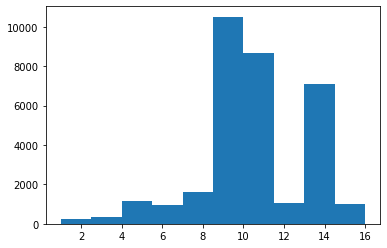

In [13]:
plt.hist(df['education-num'].values)
plt.show()

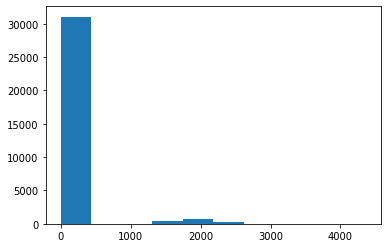

In [14]:
plt.hist(df['capital-loss'].values)
plt.show()

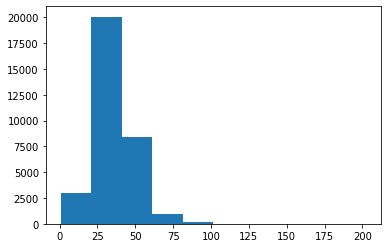

In [15]:
plt.hist(df['hours-per-week'].values)
plt.show()

In [16]:
df.shape

(32570, 15)

In [17]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


***Check for missing values and possible outliers***

In [18]:
df.isnull().values.any()

False

***Missing values are identified with ?, replacing with NaN***

In [19]:
df = df.replace('?', np.nan)

In [20]:
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [21]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [22]:
df['workclass'].value_counts().sum()

30734

In [23]:
df['occupation'].value_counts().sum()

30727

In [24]:
df['native-country'].value_counts().sum()

31987

***About 2000 are NaN***

***Model Imputation***

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
df_without_workclass1 = df[pd.isnull(df['workclass'])]
new_df = pd.get_dummies(df, columns=['education','marital-status', 'occupation',
    'relationship', 'race', 'sex','native-country'])
df_with_workclass = new_df[pd.isnull(df['workclass']) == False]
df_without_workclass = new_df[pd.isnull(df['workclass'])]

In [27]:
df_without_workclass

,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
28,54,NaN,180211,10,0,0,60,1,0,0,...,0,0,0,1,0,0,0,0,0,0
62,32,NaN,293936,4,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,25,NaN,200681,10,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
78,67,NaN,212759,6,0,0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
107,17,NaN,304873,6,34095,0,32,0,1,0,...,0,0,0,0,0,0,0,1,0,0
129,35,NaN,129305,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
150,43,NaN,174662,10,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
155,52,NaN,252903,9,0,0,45,1,0,0,...,0,0,0,0,0,0,0,1,0,0
161,68,NaN,38317,2,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0
188,53,NaN,135105,13,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df_with_workclass

,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,State-gov,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,7,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,Private,284582,14,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,Private,160187,5,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,Self-emp-not-inc,209642,9,0,0,45,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,Private,45781,14,14084,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,Private,159449,13,5178,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
rf = RandomForestClassifier()
X = df_with_workclass.drop(['workclass'],axis=1)
Y = df_with_workclass['workclass']

In [30]:
rf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
Y_pred = rf.predict(X = df_without_workclass.drop(['workclass'], axis=1))

In [32]:
df_without_workclass['workclass'] = Y_pred
data = df_with_workclass.append(df_without_workclass)
data.reset_index(inplace=True)
data.drop('index', inplace=True,axis=1)
data

,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,State-gov,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,7,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,Private,284582,14,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,Private,160187,5,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,Self-emp-not-inc,209642,9,0,0,45,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,Private,45781,14,14084,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,Private,159449,13,5178,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [34]:
df = df.drop(['workclass'], axis=1)

In [35]:
df['workclass'] = data['workclass']
df

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,workclass
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,State-gov
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Self-emp-not-inc
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Private
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Private
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Private
5,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,Private
6,49,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0,Private
7,52,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1,Self-emp-not-inc
8,31,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1,Private
9,42,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,Private


In [36]:
df_without_occupation1 = df[pd.isnull(df['occupation'])]
new_df = pd.get_dummies(df, columns=['education', 'workclass','marital-status',
    'relationship', 'race', 'sex','native-country'])
df_with_occupation = new_df[pd.isnull(df['occupation']) == False]
df_without_occupation = new_df[pd.isnull(df['occupation'])]

In [37]:
rf = RandomForestClassifier()
X = df_with_occupation.drop(['occupation'],axis=1)
Y = df_with_occupation['occupation']
rf.fit(X, Y)
Y_pred = rf.predict(X = df_without_occupation.drop(['occupation'], axis=1))
df_without_occupation['occupation'] = Y_pred
data = df_with_occupation.append(df_without_occupation)
data.reset_index(inplace=True)
data.drop('index', inplace=True,axis=1)
df = df.drop(['occupation'], axis=1)
df['occupation'] = data['occupation']
df

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,workclass,occupation
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,United-States,0,State-gov,Adm-clerical
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,United-States,0,Self-emp-not-inc,Exec-managerial
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,United-States,0,Private,Handlers-cleaners
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,0,Private,Handlers-cleaners
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,Cuba,0,Private,Prof-specialty
5,37,284582,Masters,14,Married-civ-spouse,Wife,White,Female,0,0,40,United-States,0,Private,Exec-managerial
6,49,160187,9th,5,Married-spouse-absent,Not-in-family,Black,Female,0,0,16,Jamaica,0,Private,Other-service
7,52,209642,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,45,United-States,1,Self-emp-not-inc,Exec-managerial
8,31,45781,Masters,14,Never-married,Not-in-family,White,Female,14084,0,50,United-States,1,Private,Prof-specialty
9,42,159449,Bachelors,13,Married-civ-spouse,Husband,White,Male,5178,0,40,United-States,1,Private,Exec-managerial


In [38]:
df_without_native_country1 = df[pd.isnull(df['native-country'])]
new_df = pd.get_dummies(df, columns=['education', 'workclass','marital-status',
    'relationship', 'race', 'sex','occupation'])
df_with_native_country = new_df[pd.isnull(df['native-country']) == False]
df_without_native_country = new_df[pd.isnull(df['native-country'])]
rf = RandomForestClassifier()
X = df_with_native_country.drop(['native-country'],axis=1)
Y = df_with_native_country['native-country']
rf.fit(X, Y)
Y_pred = rf.predict(X = df_without_native_country.drop(['native-country'], axis=1))
df_without_native_country['native-country'] = Y_pred
data = df_with_native_country.append(df_without_native_country)
data.reset_index(inplace=True)
data.drop('index', inplace=True,axis=1)
df = df.drop(['native-country'], axis=1)
df['native-country'] = data['native-country']
df

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,workclass,occupation,native-country
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,0,State-gov,Adm-clerical,United-States
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,0,Self-emp-not-inc,Exec-managerial,United-States
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,0,Private,Handlers-cleaners,United-States
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,0,Private,Handlers-cleaners,United-States
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,0,Private,Prof-specialty,Cuba
5,37,284582,Masters,14,Married-civ-spouse,Wife,White,Female,0,0,40,0,Private,Exec-managerial,United-States
6,49,160187,9th,5,Married-spouse-absent,Not-in-family,Black,Female,0,0,16,0,Private,Other-service,Jamaica
7,52,209642,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,45,1,Self-emp-not-inc,Exec-managerial,United-States
8,31,45781,Masters,14,Never-married,Not-in-family,White,Female,14084,0,50,1,Private,Prof-specialty,United-States
9,42,159449,Bachelors,13,Married-civ-spouse,Husband,White,Male,5178,0,40,1,Private,Exec-managerial,United-States


In [39]:
df = df.drop_duplicates()
df.reset_index(inplace=True)
df.drop(['index'], inplace=True,axis=1)

In [40]:
df

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,workclass,occupation,native-country
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,0,State-gov,Adm-clerical,United-States
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,0,Self-emp-not-inc,Exec-managerial,United-States
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,0,Private,Handlers-cleaners,United-States
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,0,Private,Handlers-cleaners,United-States
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,0,Private,Prof-specialty,Cuba
5,37,284582,Masters,14,Married-civ-spouse,Wife,White,Female,0,0,40,0,Private,Exec-managerial,United-States
6,49,160187,9th,5,Married-spouse-absent,Not-in-family,Black,Female,0,0,16,0,Private,Other-service,Jamaica
7,52,209642,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,45,1,Self-emp-not-inc,Exec-managerial,United-States
8,31,45781,Masters,14,Never-married,Not-in-family,White,Female,14084,0,50,1,Private,Prof-specialty,United-States
9,42,159449,Bachelors,13,Married-civ-spouse,Husband,White,Male,5178,0,40,1,Private,Exec-managerial,United-States


In [41]:
df = pd.get_dummies(df)

In [42]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Finished Preprocessing now building test models

***Logit model***

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import time
from pprint import pprint

from tabulate import tabulate

from sklearn.tree import export_graphviz
import os as os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
#get features df
def get_feature_df(df):
    features_df = df
    features_df = features_df.drop('salary', axis=1)
    return features_df

def get_features_list(df):
    features_df = get_feature_df(df)
    return list(features_df.columns)

#get feature array
def get_feature_arr(df):
    features_df = get_feature_df(df)
    features_arr = np.array(features_df)
    return features_arr

#get baseline features
# def get_baseline_features(df):
#     features_df = get_feature_df(df)
#     industry_col = [col for col in features_df if col.startswith('industry_group_')]
#     size_col = [col for col in features_df if col.startswith('creative_size_')]

#     baseline_features = industry_col + size_col

#     baseline_features_index = [df.columns.get_loc(c)-2 for c in features_df.columns if c in baseline_features]
#     return baseline_features_index

# def get_any_features_baselines(features,train_features, test_features, test_labels, train_labels):
#     features_index = get_any_features(features)
#     train_features_any = train_features[:,features_index]
#     test_features_any = test_features[:,features_index]
    
#     #get baseline model classification and regression
#     xgb_classification_baseline = get_xgb_model_classification(train_features_any, train_labels)
    
#     print('baseline classification model metrics')
#     score_test_and_train_auc(train_features_any, test_features_any, train_labels, test_labels, xgb_classification_baseline)

def get_any_features_classification_model(features, train_features, test_features, test_labels, train_labels):
    
    #get model
    logit = get_logit_model_classification(train_features, train_labels)

    #print metrics classification
    print('classification model metrics')
    score_test_and_train_auc(train_features, test_features, train_labels, test_labels, logit)
    
    
def get_any_features(feature_arr):
    features_df = get_feature_df(df)
    features_index = [df.columns.get_loc(c)-2 for c in features_df.columns if c in feature_arr]
    return features_index


def score_test_and_train_auc(train_features, test_features, train_labels, test_labels, model):
    predictions_test = model.predict(test_features)
    predictions_train = model.predict(train_features)
    
    print(classification_report(test_labels, predictions_test))
    print(accuracy_score(test_labels, predictions_test))
    
def get_logit_model_classification(train_features, train_labels):

    logit = LogisticRegression(**gridsearch_logit_classification(train_features, train_labels))
    #model fitting
    logit = logit.fit(train_features, train_labels) 
    return logit

    
def gridsearch_logit_classification(train_features, train_labels):
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'random_state': [0],
        'C': [3]
    }

    # Create a base model
    logit = LogisticRegression(random_state = 0)

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = logit, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
    
    # Fit the grid search to the data
    grid_search.fit(train_features, train_labels);
    
    grid_search.best_params_
    best_grid = grid_search.best_estimator_
    pprint(best_grid.get_params())
    return best_grid.get_params()



In [45]:
#save features
features_arr = get_feature_arr(df)

print('classification:')
#classification:
labels = np.array(df['salary'])

#get test and train sets
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size=0.2, random_state=0)

get_any_features_classification_model(features_arr, train_features, test_features, test_labels, train_labels)

classification:
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished


{'C': 3,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
classification model metrics
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4900
           1       0.75      0.28      0.40      1614

    accuracy                           0.80      6514
   macro avg       0.78      0.62      0.64      6514
weighted avg       0.79      0.80      0.76      6514

0.7982806263432607


***Logit estimates***

In [46]:
import statsmodels.api as sm  
    
temp = df

temp = temp.drop('salary', axis=1)
    
model = sm.OLS(train_labels, train_features)  
    
model.exog_names[:] = temp.columns
    
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     142.6
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:37:27   Log-Likelihood:                -9247.9
No. Observations:               26052   AIC:                         1.869e+04
Df Residuals:                   25955   BIC:                         1.948e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
age                                           0.0025      0.000     12.328      0.000       0.002       0.003
fnlwgt                                     5.637e-08   2.06e-08      2.733      0.006    1.59e-08    9.68e-08
education-num                                 0.0303      0.001     22.127      0.000       0.028       0.033
capital-gain                               8.208e-06   2.98e-07     27.504      0.000    7.62e-06    8.79e-06
capital-loss                               9.205e-05   5.38e-06     17.106      0.000    8.15e-05       0.000
hours-per-week                                0.0032      0.000     17.168      0.000       0.003       0.004
education_10th                               -0.0428      0.014     -3.114      0.002      -0.070      -0.016
education_11th                               -0.0443      0.012     -3.601      0.000      -0.068      -0.020
education_12th                               -0.0537      0.018     -2.907      0.004      -0.090      -0.017
education_1st-4th                            -0.0106      0.028     -0.385      0.700      -0.065       0.044
education_5th-6th                            -0.0272      0.022     -1.264      0.206      -0.069       0.015
education_7th-8th                            -0.0688      0.017     -4.078      0.000      -0.102      -0.036
education_9th                                -0.0589      0.018     -3.335      0.001      -0.093      -0.024
education_Assoc-acdm                         -0.0769      0.012     -6.639      0.000      -0.100      -0.054
education_Assoc-voc                          -0.0514      0.010     -5.014      0.000      -0.071      -0.031
education_Bachelors                           0.0111      0.007      1.635      0.102      -0.002       0.024
education_Doctorate                           0.1187      0.016      7.221      0.000       0.087       0.151
education_HS-grad                            -0.0864      0.006    -15.422      0.000      -0.097      -0.075
education_Masters                             0.0763      0.010      7.697      0.000       0.057       0.096
education_Preschool                           0.0158      0.045      0.347      0.729      -0.073       0.105
education_Prof-school                         0.0895      0.015      6.012      0.000       0.060       0.119
education_Some-college                       -0.0506      0.006     -8.745      0.000      -0.062      -0.039
marital-status_Divorced                      -0.0788      0.015     -5.326      0.000      -0.108      -0.050
marital-status_Married-AF-spouse              0.1082      0.073      1.474      0.141      -0.036       0.252
marital-status_Married-civ-spouse             0.0366      0.021      1.704      0.088      -0.006       0.079
mar

***Checking collinearity of features***

In [47]:
from sklearn.linear_model import LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

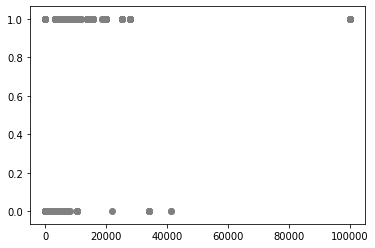

In [48]:
X = df['capital-gain'].values.reshape(-1,1)
Y = df['salary'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plt.scatter(X, Y,  color='gray')
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

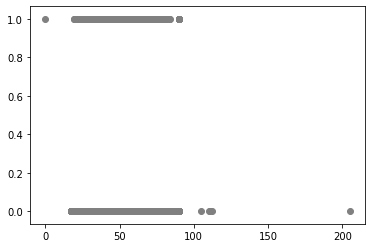

In [49]:
X = df['age'].values.reshape(-1,1)
Y = df['salary'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plt.scatter(X, Y,  color='gray')
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

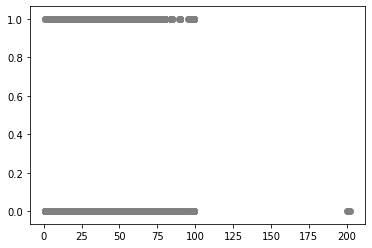

In [50]:
X = df['hours-per-week'].values.reshape(-1,1)
Y = df['salary'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plt.scatter(X, Y,  color='gray')
plt.show()

Text(0.5, 0, 'hours-per-week')

Text(0, 0.5, 'salary')

(0, 0.005)

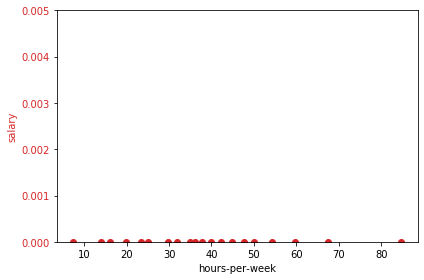

In [51]:
df_plot = df[df['salary']<.5]

df_plot['quantile_ex_1'] = pd.qcut(df_plot['hours-per-week'], q=50, duplicates='drop')

a = df_plot.groupby(['quantile_ex_1'])['salary'].mean() 
c = df_plot.groupby(['quantile_ex_1'])['salary'].count()
b = df_plot.groupby(['quantile_ex_1'])['hours-per-week'].mean() 

a = np.array(a)
c = np.array(c)
b = np.array(b)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('hours-per-week')
ax1.set_ylabel('salary', color=color)
plt.ylim(0,0.005)
ax1.scatter(b, a, color=color)
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:blue'
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

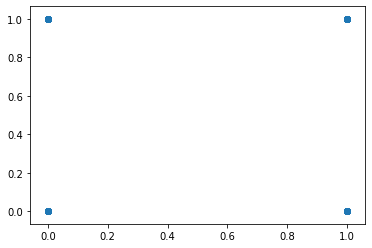

In [52]:
# plot
plt.scatter(df['sex_Female'], df['salary'])
plt.show()

***Using Random Forest***

In [53]:
#get features df
def get_feature_df(df):
    features_df = df
    features_df = features_df.drop('salary', axis=1)
    return features_df

def get_features_list(df):
    features_df = get_feature_df(df)
    return list(features_df.columns)

#get feature array
def get_feature_arr(df):
    features_df = get_feature_df(df)
    features_arr = np.array(features_df)
    return features_arr

def score_test_and_train_auc(train_features, test_features, train_labels, test_labels, model):
    predictions_test = model.predict(test_features)
    predictions_train = model.predict(train_features)
    
    print(classification_report(test_labels, predictions_test))
    print(accuracy_score(test_labels, predictions_test))
    
def get_rf_model_classification(train_features, train_labels):

    rf = RandomForestClassifier(**gridsearch_rf_classification(train_features, train_labels))
    #model fitting
    rf = rf.fit(train_features, train_labels)
    selector = RFE(rf, step=1, verbose=3)
    selector = selector.fit(train_features, train_labels)
    print("Features sorted by their rank:")
    pprint(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), feature_list)))
    return rf
    
def gridsearch_rf_classification(train_features, train_labels):
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_depth': [60],
        'min_samples_leaf': [5],
        'min_samples_split': [3],
        'n_estimators': [200],
        'random_state': [0],
        'oob_score': [True]
    }

    # Create a base model
    rf = RandomForestClassifier(random_state = 0)

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
    
    # Fit the grid search to the data
    grid_search.fit(train_features, train_labels);
    
    grid_search.best_params_
    best_grid = grid_search.best_estimator_
    pprint(best_grid.get_params())
    return best_grid.get_params()

***Hyper parameter tuning and model performance***

In [54]:
#save features
features_arr = get_feature_arr(df)

feature_list = get_features_list(df)

print('classification:')
#classification:
labels = np.array(df['salary'])

#get test and train sets
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size=0.2, random_state=0)

#get model
rf = get_rf_model_classification(train_features, train_labels)

#print metrics
print('model metrics')
score_test_and_train_auc(train_features, test_features, train_labels, test_labels, rf)

classification:
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 

***Feature importance***

In [55]:
importances = rf.feature_importances_
headers = ["name", "score"]
values = sorted(zip(feature_list, rf.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                                             score
capital-gain                               0.160387
marital-status_Married-civ-spouse          0.136333
education-num                              0.121863
age                                        0.0836457
relationship_Husband                       0.074959
hours-per-week                             0.0580522
marital-status_Never-married               0.0405973
capital-loss                               0.0390237
fnlwgt                                     0.03059
education_Bachelors                        0.0249362
relationship_Not-in-family                 0.0222794
relationship_Own-child                     0.0197671
sex_Female                                 0.0183473
relationship_Wife                          0.0175928
education_Masters                          0.0159266
sex_Male                                   0.0124752
education_HS-grad                          0.012455
education_Prof-school                      0.009609

***Feature Selection***

In [56]:
new_df = df.drop(['workclass_Never-worked', 'workclass_Without-pay', 'occupation_Armed-Forces',
                  'native-country_Holand-Netherlands', 'native-country_Honduras', 'native-country_Hong',                        
                  'native-country_Hungary', 'native-country_Ireland', 'native-country_Outlying-US(Guam-USVI-etc)',  
                  'native-country_Scotland', 'native-country_Thailand', 'native-country_Yugoslavia', 'occupation_Sales',
                  'occupation_Protective-serv', 'native-country_China', 'native-country_Greece' ,'native-country_Honduras'], axis=1)

# Select best model

***Testing Logistic Regression***

In [57]:
# selected features
features_arr = get_feature_arr(new_df)

print('classification:')
#classification:
labels = np.array(new_df['salary'])

#get test and train sets
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size=0.2, random_state=0)

#get model
rf = get_rf_model_classification(train_features, train_labels)

#print metrics
print('model metrics')
score_test_and_train_auc(train_features, test_features, train_labels, test_labels, rf)

classification:
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 featur

***Testing Random Forest***

In [58]:
#save features
features_arr = get_feature_arr(new_df)

print('classification:')
#classification:
labels = np.array(new_df['salary'])

#get test and train sets
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size=0.2, random_state=0)

get_any_features_classification_model(features_arr, train_features, test_features, test_labels, train_labels)

classification:
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


{'C': 3,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
classification model metrics
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4900
           1       0.75      0.28      0.40      1614

    accuracy                           0.80      6514
   macro avg       0.78      0.62      0.64      6514
weighted avg       0.79      0.80      0.76      6514

0.7982806263432607


***Cross validation is not necessary for Random Forest***

***Cross Validation for Logistic Regression***

In [59]:
import random

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 0, classification_report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88      4955
           1       0.69      0.24      0.36      1559

    accuracy                           0.79      6514
   macro avg       0.75      0.60      0.62      6514
weighted avg       0.78      0.79      0.75      6514
, Accuracy: 0.7932146146760822 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 1, classification_report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88      4951
           1       0.71      0.26      0.38      1563

    accuracy                           0.80      6514
   macro avg       0.75      0.61      0.63      6514
weighted avg       0.78      0.80      0.76      6514
, Accuracy: 0.7958243782622045 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 2, classification_report:               precision    recall  f1-score   support

           0       0.80      0.96      0.88      4934
           1       0.70      0.26      0.38      1580

    accuracy                           0.79      6514
   macro avg       0.75      0.61      0.63      6514
weighted avg       0.78      0.79      0.76      6514
, Accuracy: 0.7935216456862143 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 3, classification_report:               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4973
           1       0.73      0.25      0.37      1541

    accuracy                           0.80      6514
   macro avg       0.77      0.61      0.63      6514
weighted avg       0.79      0.80      0.76      6514
, Accuracy: 0.8008903899293829 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 4, classification_report:               precision    recall  f1-score   support

           0       0.81      0.96      0.88      4974
           1       0.70      0.27      0.39      1540

    accuracy                           0.80      6514
   macro avg       0.76      0.62      0.64      6514
weighted avg       0.79      0.80      0.76      6514
, Accuracy: 0.8005833589192508 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 5, classification_report:               precision    recall  f1-score   support

           0       0.80      0.96      0.88      4946
           1       0.70      0.26      0.38      1568

    accuracy                           0.79      6514
   macro avg       0.75      0.61      0.63      6514
weighted avg       0.78      0.79      0.76      6514
, Accuracy: 0.7947497697267424 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 6, classification_report:               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4965
           1       0.74      0.27      0.40      1549

    accuracy                           0.80      6514
   macro avg       0.77      0.62      0.64      6514
weighted avg       0.79      0.80      0.77      6514
, Accuracy: 0.803807184525637 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 7, classification_report:               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4929
           1       0.74      0.28      0.40      1585

    accuracy                           0.80      6514
   macro avg       0.77      0.62      0.64      6514
weighted avg       0.79      0.80      0.76      6514
, Accuracy: 0.8001228124040528 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 8, classification_report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88      4929
           1       0.72      0.26      0.39      1585

    accuracy                           0.80      6514
   macro avg       0.76      0.62      0.63      6514
weighted avg       0.78      0.80      0.76      6514
, Accuracy: 0.7959778937672705 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trial 9, classification_report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88      4923
           1       0.73      0.26      0.39      1591

    accuracy                           0.80      6514
   macro avg       0.77      0.62      0.63      6514
weighted avg       0.79      0.80      0.76      6514
, Accuracy: 0.7962849247774025 


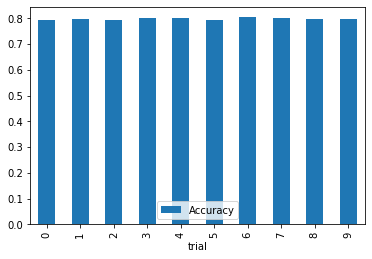

In [60]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(new_df.drop(['salary'],axis=1), new_df['salary'], test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    print('Trial {}, classification_report: {}, Accuracy: {} '.format(i, classification_report(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)))
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

In [61]:
print(rdf['Accuracy'].mean())

0.7974976972674239


***Logistic Regression passed Cross Validation***

***Testing Decision Tree***

In [62]:
#get features df
def get_feature_df(df):
    features_df = df
    features_df = features_df.drop('salary', axis=1)
    return features_df

def get_features_list(df):
    features_df = get_feature_df(df)
    return list(features_df.columns)


#get feature array
def get_feature_arr(df):
    features_df = get_feature_df(df)
    features_arr = np.array(features_df)
    return features_arr

# #get baseline features
# def get_baseline_features(df):
#     features_df = get_feature_df(df)
#     industry_col = [col for col in features_df if col.startswith('industry_group_')]
#     size_col = [col for col in features_df if col.startswith('creative_size_')]

#     baseline_features = industry_col + size_col

#     baseline_features_index = [df.columns.get_loc(c)-2 for c in features_df.columns if c in baseline_features]
#     return baseline_features_index


def score_test_and_train_auc(train_features, test_features, train_labels, test_labels, model):
    predictions_test = model.predict(test_features)
    predictions_train = model.predict(train_features)
    
    print(classification_report(test_labels, predictions_test))
    print(accuracy_score(test_labels, predictions_test))
    

# def score_test_and_train_rmse(train_features, test_features, train_labels, test_labels, model):
#     predictions_test = model.predict(test_features)
#     predictions_train = model.predict(train_features)
    
#     print('test RMSE: ' + str(np.sqrt(metrics.mean_squared_error(test_labels, predictions_test))))
    
#     print('train RMSE: ' + str(np.sqrt(metrics.mean_squared_error(train_labels, predictions_train))))
    

def get_dt_model_classification(train_features, train_labels):
    dt = DecisionTreeClassifier(**gridsearch_dt_classification(train_features,train_labels))
    #model fitting
    dt = dt.fit(train_features, train_labels)
    selector = RFE(dt, step=1, verbose=3)
    selector = selector.fit(train_features, train_labels)
    print("Features sorted by their rank:")
    pprint(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), feature_list)))
    return dt

# def get_dt_model_regression(train_features, train_labels):
#     dt = DecisionTreeRegressor(**gridsearch_dt_regression(train_features,train_labels))
#     #model fitting
#     dt = dt.fit(train_features, train_labels)
#     selector = RFE(dt, step=1, verbose=3)
#     selector = selector.fit(train_features, train_labels)
#     print("Features sorted by their rank:")
#     pprint(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), feature_list)))
#     return dt

# def gridsearch_dt_regression(train_features, train_labels):
#     # Create the parameter grid based on the results of random search 
#     param_grid = {
#          'max_depth': [None],
#          'min_samples_leaf': [19],
#          'presort' : [True],
#          'max_leaf_nodes' : [14],
#          'random_state' :[0],
#          'min_samples_split' : [2]
#     }

#     # Create a base model
#     dt = DecisionTreeRegressor(random_state = 0)

#     # Instantiate the grid search model
#     grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
    
#     # Fit the grid search to the data
#     grid_search.fit(train_features, train_labels);
    
#     grid_search.best_params_
#     best_grid = grid_search.best_estimator_
#     pprint(best_grid.get_params())
#     return best_grid.get_params()
    
def gridsearch_dt_classification(train_features, train_labels):
    # Create the parameter grid based on the results of random search 
    param_grid = {
         'criterion':['gini'],
         'max_depth': [7],
         'presort' : [True],
         'max_leaf_nodes' : [35],
         'random_state': [0],
         'min_samples_leaf': [25],
         'min_samples_split' : [15, 20, 25]
    }

    # Create a base model
    dt = DecisionTreeClassifier(random_state = 0)

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
    
    # Fit the grid search to the data
    grid_search.fit(train_features, train_labels);
    
    grid_search.best_params_
    best_grid = grid_search.best_estimator_
    pprint(best_grid.get_params())
    return best_grid.get_params()

In [63]:
#save features
features_arr = get_feature_arr(new_df)

#get list of features
# feature_list = get_features_list(df)
# baseline_features_index = get_baseline_features(df)

print('classification:')
#classification:
labels = np.array(new_df['salary'])

#get test and train sets
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size=0.2, random_state=0)

#get model
dt = get_dt_model_classification(train_features, train_labels)

#print metrics
print('model metrics')
score_test_and_train_auc(train_features, test_features, train_labels, test_labels, dt)

# #get baseline featuers
# train_features_baseline = train_features[:,baseline_features_index]
# test_features_baseline = test_features[:,baseline_features_index]

# #get baseline model
# dt_baseline = get_dt_model_classification(train_features_baseline, train_labels)

# print('baseline model metrics')
# score_test_and_train_auc(train_features_baseline, test_features_baseline, train_labels, test_labels, dt_baseline)

# #regressions model
# print('regressions:')
# labels = np.array(df['CTR'])

# #get test and train sets
# train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size=0.2, random_state=0)

# #get model
# dt = get_dt_model_regression(train_features, train_labels)


# #print metrics
# print('model metrics')
# score_test_and_train_rmse(train_features, test_features, train_labels, test_labels, dt)

# #get baseline featuers
# train_features_baseline = train_features[:,baseline_features_index]
# test_features_baseline = test_features[:,baseline_features_index]

# #get baseline model
# dt_baseline = get_dt_model_regression(train_features_baseline, train_labels)

# print('baseline model metrics')
# score_test_and_train_rmse(train_features_baseline, test_features_baseline, train_labels, test_labels, dt_baseline)

classification:
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.8s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.4s finished


{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': 35,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 25,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'presort': True,
 'random_state': 0,
 'splitter': 'best'}
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitt

***Cross validation for Decision Tree***

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 0, classification_report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4952
           1       0.61      0.60      0.61      1562

    accuracy                           0.81      6514
   macro avg       0.75      0.74      0.74      6514
weighted avg       0.81      0.81      0.81      6514
, Accuracy: 0.8140927233650599 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 1, classification_report:               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4973
           1       0.58      0.61      0.60      1541

    accuracy                           0.80      6514
   macro avg       0.73      0.74      0.73      6514
weighted avg       0.81      0.80      0.81      6514
, Accuracy: 0.8045747620509671 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 2, classification_report:               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4926
           1       0.60      0.62      0.61      1588

    accuracy                           0.81      6514
   macro avg       0.74      0.74      0.74      6514
weighted avg       0.81      0.81      0.81      6514
, Accuracy: 0.8056493705864293 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 3, classification_report:               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4926
           1       0.60      0.60      0.60      1588

    accuracy                           0.80      6514
   macro avg       0.73      0.74      0.74      6514
weighted avg       0.80      0.80      0.80      6514
, Accuracy: 0.8041142155357691 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 4, classification_report:               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4958
           1       0.58      0.60      0.59      1556

    accuracy                           0.80      6514
   macro avg       0.73      0.73      0.73      6514
weighted avg       0.80      0.80      0.80      6514
, Accuracy: 0.8011974209395148 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 5, classification_report:               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4932
           1       0.58      0.61      0.59      1582

    accuracy                           0.80      6514
   macro avg       0.73      0.73      0.73      6514
weighted avg       0.80      0.80      0.80      6514
, Accuracy: 0.7979735953331286 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 6, classification_report:               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4972
           1       0.60      0.60      0.60      1542

    accuracy                           0.81      6514
   macro avg       0.74      0.74      0.74      6514
weighted avg       0.81      0.81      0.81      6514
, Accuracy: 0.8088731961928155 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 7, classification_report:               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4974
           1       0.59      0.61      0.60      1540

    accuracy                           0.81      6514
   macro avg       0.74      0.74      0.74      6514
weighted avg       0.81      0.81      0.81      6514
, Accuracy: 0.8093337427080135 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 8, classification_report:               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4930
           1       0.59      0.61      0.60      1584

    accuracy                           0.80      6514
   macro avg       0.73      0.74      0.74      6514
weighted avg       0.81      0.80      0.80      6514
, Accuracy: 0.8039607000307031 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Trial 9, classification_report:               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4930
           1       0.61      0.60      0.61      1584

    accuracy                           0.81      6514
   macro avg       0.74      0.74      0.74      6514
weighted avg       0.81      0.81      0.81      6514
, Accuracy: 0.8104083512434755 


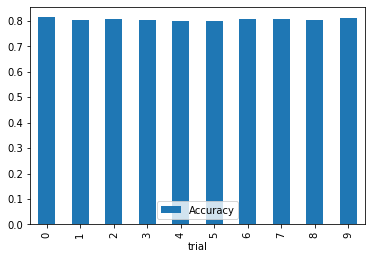

In [64]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(new_df.drop(['salary'],axis=1), new_df['salary'], test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    print('Trial {}, classification_report: {}, Accuracy: {} '.format(i, classification_report(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)))
    
rdfdt = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdfdt.plot.bar(x='trial', y='Accuracy')

In [65]:
print(rdf['Accuracy'].mean())

0.7974976972674239


# Best model is Logistic Regression